In [181]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np


In [182]:
data = pd.read_excel('datasets/MigrantesChile (2005-2016).xlsx')
selected_rows = data[data["Continent"] == 'America']
#selected_columns = selected_rows[["ID Continent", "Continent", "ID Country","Country",2010]]
selected_columns = selected_rows[["Country",2010]]
filtered_data = selected_columns[selected_rows['Country'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'])]
filtered_data.set_index('Country', inplace=True)
filtered_data

,2010
Country,
Argentina,5387
Bolivia,7423
Brazil,1818
Colombia,8921
Ecuador,3624
Guyana,2
Paraguay,889
Peru,38048
Suriname,1


In [183]:
total_values = sum(filtered_data[2010])
category_proportions = [(float(value) / total_values) for value in filtered_data[2010]]
for i, proportion in enumerate(category_proportions):
    print (filtered_data.index.values[i] + ': ' + str(proportion))

Argentina: 0.07876421908354533
Bolivia: 0.10853291224376407
Brazil: 0.02658127905956663
Colombia: 0.13043541831154778
Ecuador: 0.052987104131941395
Guyana: 2.9242331198643156e-05
Paraguay: 0.012998216217796883
Peru: 0.5563061087229874
Suriname: 1.4621165599321578e-05
Uruguay: 0.017399187063192677
Venezuela: 0.015951691668859843


In [184]:
width = 40 # ancho del of chart
height = 10 # altura del chart

total_num_tiles = width * height # número total de celdas

print ('Número total de celdas: ', total_num_tiles)

Número total de celdas:  400


In [185]:
# calcula la cantidad de celdas por categoría
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# imprime número de celdas por categoría
for i, tiles in enumerate(tiles_per_category):
    print (filtered_data.index.values[i] + ': ' + str(tiles))

Argentina: 32
Bolivia: 43
Brazil: 11
Colombia: 52
Ecuador: 21
Guyana: 0
Paraguay: 5
Peru: 223
Suriname: 0
Uruguay: 7
Venezuela: 6


In [186]:
# inicializa el waffle chart como una matriz vacía
waffle_chart = np.zeros((height, width))

# índices que recorren la estructura
category_index = 0
tile_index = 0

# poblar el waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # si el número de celdas para la categoría actual es igual a las celdas asignadas...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...se continúa con la siguiente categoría
            category_index += 1       
            
        # Se asigna el valor de la categoría actual a las coordenadas row,col
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [187]:
waffle_chart

array([[ 1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  4.,  4.,
         4.,  5.,  5.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        10.],
       [ 1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  4.,  4.,
         4.,  5.,  5.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        10.],
       [ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  4.,  4.,
         4.,  5.,  5.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        10.],
       [ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  4.,  4.,
         4.,  5.,  5.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        10.],
       [ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  4., 

<Figure size 640x480 with 0 Axes>

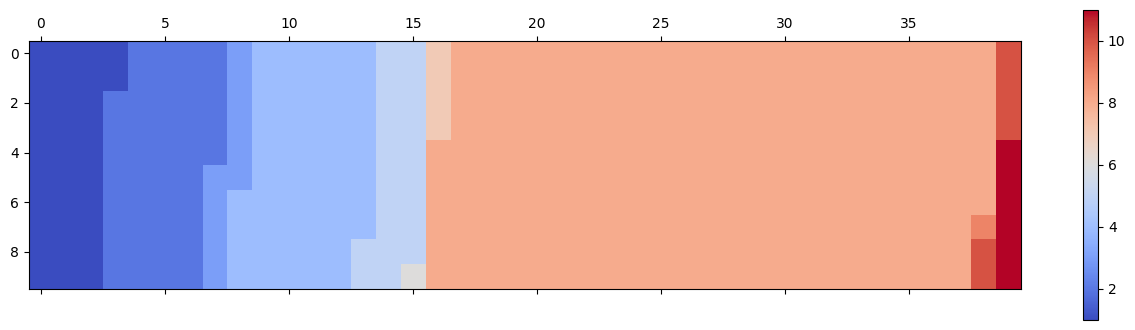

In [188]:
# se crea un nuevo objeto figura
fig = plt.figure()

# matwhow para desplegar el waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

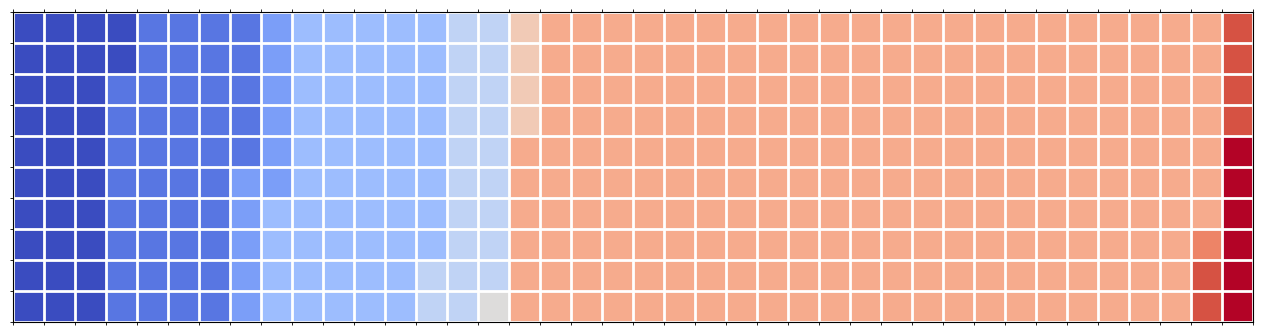

In [189]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)


# se obtienen los ejes de la gráfica
ax = plt.gca()

# se setean los ticks menores de cada eje
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# se añaden líneas de grilla de acuerdo a los ticks menores
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

Text(0.5, 1.0, 'Inmigración nacional de paises SudAmericanos 2010')

<Figure size 640x480 with 0 Axes>

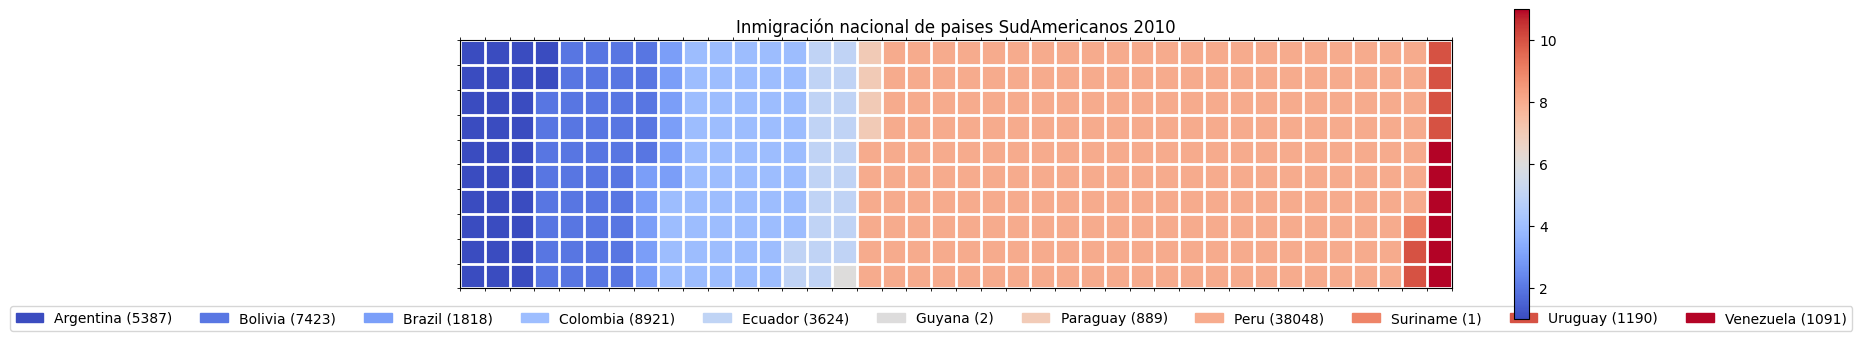

In [190]:

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
    
# se crea leyenda
legend_handles = []
for i, category in enumerate(filtered_data.index.values):
    label_str = category + ' (' + str(filtered_data[2010][i]) + ')'
    color_val = colormap(float(i)/(filtered_data.shape[0]-1))
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# se añade leyenda
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(filtered_data.index.values),
           bbox_to_anchor=(0, -0.2, 0.95, .1)
          )

plt.title('Inmigración nacional de paises SudAmericanos 2010')